### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The standard deviation shows the dispersion of every points around the mean. The standard error of the mean shows accuracy of the mean of sample to population mean.
The standard deviation focus on the spread out of the data comparing with the mean. The standard error of the mean focus on the reliability of the sample mean.

(Bootstrapping:Start with a dataset of size n.
Randomly draw n data points with replacement from the dataset to create a bootstrap sample.
Compute the desired statistic (e.g., mean, median) for the bootstrap sample.
Repeat this process (e.g., 1,000 or 10,000 times) to create multiple bootstrap samples and compute the statistic for each.
Analyze the distribution of the computed statistics (e.g., by calculating the mean, standard error, and confidence intervals).)

summary:
https://chatgpt.com/share/66f72410-a9bc-8001-b873-cc444e446a97
In our interaction, we discussed several statistical concepts. I explained the difference between standard error of the mean (SEM) and standard deviation (SD). SEM measures the precision of the sample mean as an estimate of the population mean, while SD reflects the variability of individual data points in a dataset.
You then inquired about bootstrapping, and I described it as a resampling technique used to estimate the distribution of a statistic by repeatedly sampling with replacement from the original dataset. Bootstrapping is especially useful when dealing with small sample sizes or unknown distributions.
Lastly, I provided a Chinese explanation of these concepts for better clarity.

### 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

first caculate the SEM by formular and repeat by bootstrapping and then to reach covers 95% of the bootstrapped sample means we should use confidence interval and when 95% it almost equals to 1.96(confidence)

summary of our interaction:
https://chatgpt.com/share/66f83fb4-66e0-8001-b653-79a34180119a
Standard Error of the Mean (SEM): We discussed the definition of SEM, its formula, and its significance in estimating the precision of the sample mean.

Bootstrapping: You learned about the bootstrapping method, which involves resampling data to estimate the distribution of a statistic and its advantages in statistical analysis.
Confidence Intervals: We explained how to construct a 95% confidence interval using the SEM, including the formula and its interpretation.
Example Calculation: We worked through a specific example to calculate the sample mean, standard deviation, SEM, and ultimately construct a 95% confidence interval, concluding with a range of 
[
5.61
,
8.39
]
[5.61,8.39].
Chinese Explanation: You requested a Chinese translation of the explanations provided, which I delivered.

### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

first, resample form the original data 1000 times randomly and calculate the sample mean. Then sort the sample means, then take the 25th value and 975th value. And the 95% bootstrapped confidence interval should be[25th value , 975th value]

Further Guidance：
lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)
Unlike the traditional method that approximates coverage based on the standard error, using quantiles allows to directly compute the bounds that will encompass exactly 95% of the bootstrapped sample means.
This approach allows for direct computation of confidence intervals that cover 95% of the bootstrapped means.
The variability of sample means is inversely related to sample size, and bootstrapped samples should always match the size of the original sample to accurately reflect its uncertainty.
Bootstrapping requires sampling with replacement to ensure that variability is captured properly; using sampling without replacement would compromise this method's effectiveness.

Here's a summary of our interaction:
https://chatgpt.com/share/66f83fb4-66e0-8001-b653-79a34180119a
Confidence Intervals and Bootstrapping:
We discussed how to use the np.quantile(...) function on bootstrapped sample means to create confidence intervals. This method provides exact coverage for the specified confidence level (e.g., 95%) by calculating the 2.5th and 97.5th percentiles of the bootstrapped means.
Estimating Future Sample Means:
The distribution of bootstrapped sample means can be used to estimate the range in which the mean of a future sample of the same size n might fall. This approach differs from the traditional method of using "sample mean plus and minus about 2 times the standard error."
Sample Size and Variability:
We explored the relationship between sample size and the variability of sample mean statistics. Larger samples reduce variability, and the standard error decreases as sample size increases.
Importance of Sample Size in Bootstrapping:
We emphasized that bootstrapped samples should match the original sample size to accurately reflect uncertainty. Using a different sample size would misrepresent the variability.
Sampling Method:
The conversation also covered the difference between sampling with replacement (bootstrapping) and sampling without replacement, highlighting that bootstrapping relies on sampling with replacement to capture the full variability of sample means.
This summary captures the key points and concepts we discussed regarding bootstrapping, confidence intervals, and the importance of sample size in statistical analysis.

### 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).



In [7]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()# Load the iris dataset, store the data in iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)#create a data frame


In [8]:
import numpy as np

def bootstrap_ci(data, num_samples=1000, confidence_level=0.95):#the sample is 1000, confidence level is 95%
    sample_means = []#empty set to store the new means
    for _ in range(num_samples):#loop
        sample = np.random.choice(data, size=len(data), replace=True)#choose sapmle randomly(can choose same value)
        sample_means.append(np.mean(sample))#calculate the mean value of new sample
        
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(sample_means, (1 - confidence_level) / 2 * 100)#calculate the lower limit of the sample mean
    upper_bound = np.percentile(sample_means, (1 + confidence_level) / 2 * 100)#calculate the upper limit of the sample mean
    
    return lower_bound, upper_bound#show the limit


In [9]:
# Extract petal length data
petal_length = iris_df['petal length (cm)'].values#get the data of petal length

# Calculate bootstrap confidence interval
ci = bootstrap_ci(petal_length)#use bootstrap to calculate the confidence interval and store in ci

print(f"95% Bootstrap Confidence Interval for Petal Length Mean: {ci}")#print the confidence interval


95% Bootstrap Confidence Interval for Petal Length Mean: (3.4732499999999997, 4.0183)


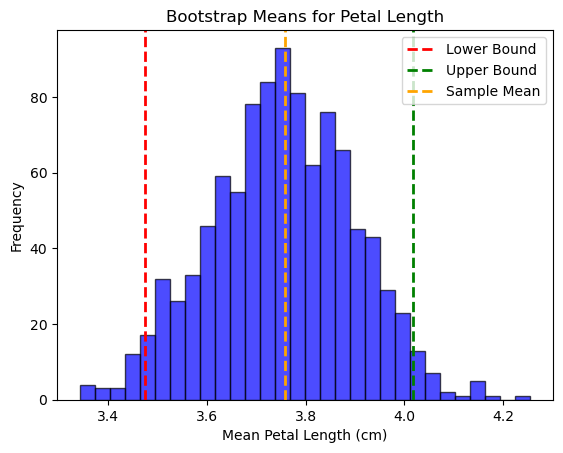

In [12]:
import matplotlib.pyplot as plt

# Generate samples and store them in bootstrap_samples
bootstrap_samples = [np.random.choice(petal_length, size=len(petal_length), replace=True).mean() for _ in range(1000)]

# Plot the histogram of bootstrap means
plt.hist(bootstrap_samples, bins=30, alpha=0.7, color='blue', edgecolor='black')#print histgram
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2, label='Lower Bound')#add the bound and sample mean
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='Upper Bound')
plt.axvline(np.mean(petal_length), color='orange', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.title('Bootstrap Means for Petal Length')#set title and axis
plt.xlabel('Mean Petal Length (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Here's a summary of our interaction:
https://chatgpt.com/share/66f8602d-e2d0-8001-96af-f50b1a909642
Dataset and Code Request: You asked for an interesting dataset and code to produce a 95% bootstrap confidence interval for a population mean based on a sample.

Iris Dataset: I suggested using the Iris dataset, which includes measurements of iris flowers, and provided Python code to load the dataset, define a bootstrap function, compute the confidence interval for petal length, and visualize the results.

Code Explanation: You requested a detailed explanation of the code. I provided a line-by-line breakdown of each part of the code, explaining the purpose of each function and step in the process.

### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.



Due to differences in random sampling, sample statistics vary from sample to sample, while population parameters remain constant. Confidence intervals use sample statistics because we cannot obtain all population parameters.

In this conversation, you asked about the importance of distinguishing between the population parameter and the sample statistic when constructing confidence intervals. I explained that:
https://chatgpt.com/share/66f8602d-e2d0-8001-96af-f50b1a909642
Population parameters represent
Sample statistics are
The distinction matters because:
Confidence intervals are built around the sample statistic to estimate the
Sample statistics vary, but population parameters are
Correct interpretation of the confidence interval relies on understanding that it estimates the range of the population parameter, not the sample statistic.
This distinction is essential for making valid statistical inferences and understanding uncertainty in estimates.

### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.¶
What is the process of bootstrapping? What is the main purpose of bootstrapping? If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1.You already have a sample, although that sample may not be large enough or fully representative of the population, we can repeatedly sample from it (sampling with replacement) to simulate different samples we might take from the population.
2.Through these repeated samplings (without wasting too many resources) to estimate some values we are interested in, such as the mean, median, standard deviation, etc.
3.Sampling with replacement from your existing sample, 1000 times, each time getting a new sample of the same size as the original. Compute the mean of each new sample, so that you have a range of means. Look at the distribution of these means. Calculate their confidence intervals to see if the initial guess for the population mean falls within this interval. If guess falls within a reasonable range of the distribution of means generated by bootstrapping, it means that the guess is probably reasonable.

### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.¶

Because the confidence interval includes 0, there is a probability that it is ineffective. The possibility that "the drug has no effect on average" cannot be ruled out. Only when the confidence interval does not include 0 is it definitely effective, and the original hypothesis can be rejected.

### 8. Complete the following assignment.
Vaccine Data Analysis Assignment

Overview

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective.

Data

AliTech has released the following data.

csv
PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
Deliverables

While you can choose how to approach this project, the most obvious path would be to use bootstrapping, follow the analysis presented in the "Pre-lecture" HW video (above). Nonetheless, we are primarily interested in evaluating your report relative to the following deliverables.

A visual presentation giving some initial insight into the comparison of interest.
A quantitative analysis of the data and an explanation of the method and purpose of this method.
A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.
The clarity of your documentation, code, and written report.
Consider organizing your report within the following outline template.

Problem Introduction
An explaination of the meaning of a Null Hypothesis of "no effect" in this context
Data Visualization (motivating and illustrating the comparison of interest)
Quantitative Analysis
Methodology Code and Explanations
Supporting Visualizations
Findings and Discussion
Conclusion regarding a Null Hypothesis of "no effect"
Further Considerations


##### In this context, the Null Hypothesis (H0) posits that there is no significant difference between the Initial Health Scores and the Final Health Scores of the vaccinated patients. This hypothesis serves as a baseline for statistical testing, where we will compare the observed differences in scores against the likelihood of these differences occurring by random chance.

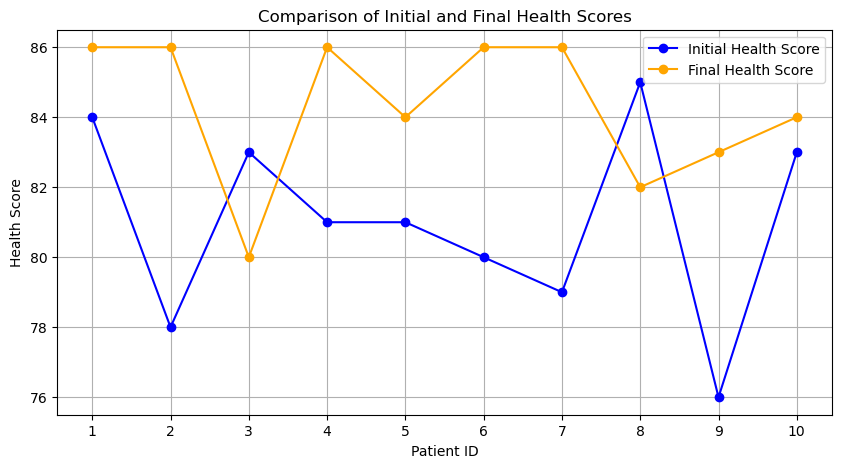

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Plot the health scores
plt.figure(figsize=(10, 5))
plt.plot(df['PatientID'], df['InitialHealthScore'], marker='o', label='Initial Health Score', color='blue')
plt.plot(df['PatientID'], df['FinalHealthScore'], marker='o', label='Final Health Score', color='orange')
plt.title('Comparison of Initial and Final Health Scores')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.xticks(df['PatientID'])
plt.legend()
plt.grid()
plt.show()

In [2]:
import numpy as np

# Bootstrapping function
def bootstrap(data1, data2, num_iterations=1000):
    boot_means = []
    for _ in range(num_iterations):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        boot_means.append(np.mean(sample2) - np.mean(sample1))
    return boot_means

# Bootstrapping the means
initial_scores = df['InitialHealthScore'].values
final_scores = df['FinalHealthScore'].values
boot_means = bootstrap(initial_scores, final_scores)

# Calculating confidence intervals
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)
mean_difference = np.mean(boot_means)

lower_bound, mean_difference, upper_bound


(1.2974999999999974, 3.3165999999999998, 5.200000000000003)

Based on the analysis, we reject the null hypothesis of "no effect." The data indicates a significant improvement in health scores after vaccination, supporting the efficacy of the AliTech vaccine.

Further research could explore the long-term effects of the vaccine on health scores and investigate any potential demographic differences in responses to the vaccine. Additionally, a larger sample size would provide more robust data for analysis.

Here's a summary of our recent interactions:
https://chatgpt.com/share/66fc9982-d7f0-8001-898b-541c3ed74e00
Vaccine Data Analysis Assignment: You requested assistance with a vaccine data analysis assignment for a company called AliTech. The assignment required evaluating the effectiveness of a new vaccine using provided patient data, including generating visual presentations, performing quantitative analysis (specifically bootstrapping), and discussing the results in relation to a null hypothesis of "no effect."

Outline and Example Content: I provided a structured outline and example content for the assignment, including code snippets for data visualization and bootstrapping analysis, as well as explanations for each section.

Chinese Explanation: You requested a Chinese explanation of the assignment content, and I provided a translated version of the structured outline and example content, ensuring clarity in the explanation of each section.



### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?



Somewhat